# **Đề tài: Gợi ý đặt phòng khách sạn**

### Tóm tắt đề tài:
- Đặt vấn đề: với sự phát triển của các website thương mại điện tử, việc đưa người dùng tiếp cận những sản phẩm phù hợp là rất cần thiết. Và gợi ý đặt phòng khách sạn ra đời để đáp ứng nhu cầu đó. Nó giúp gợi ý đặt phòng khách sạn tốt nhất cho người dùng với hai tiêu chí chính đó là giá cả thấp và chất lượng tốt nhất.
- Phương pháp giải quyết: đầu tiên, cần thu thập được dữ liệu từ các khách sạn. Từ dữ liệu đó, nhóm em sẽ trích xuất đặc trưng cần thiết và đề xuất ra hai giải pháp đó là thuật toán K-means và thuật toán Hierarchical để phân cụm dữ liệu dựa theo các đặc trưng đã chọn. Sau đó, so sánh, đánh giá bằng hai thuật toán đó là DB Index và Silhouette Index.
- Kết quả đạt được: chọn được vùng dữ liệu chứa các khách sạn có chất lượng tốt và giá cả lại thấp để đưa ra được các gợi ý cho người dùng.


**Import các thư viện cần thiết**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

**Đọc dữ liệu từ file rawdata.csv**

In [2]:
dataFrame = pd.read_csv('./rawdata.csv')
dataFrame.head()

,Unnamed: 0,Name,Price,Rating,Reviews,Location
0,0,Lucky Star Hotel 266 De Tham,"165,000",8.2,"1,004","District 1, Ho Chi Minh City"
1,1,Eden Garden Hotel,"160,000",8.0,377,"District 1, Ho Chi Minh City"
2,2,Ngan Ha Hotel,"516,000",8.1,113,"District 1, Ho Chi Minh City"
3,3,Anh Duy Hotel - Nguyễn Công Trứ The Bitexco Ne...,"90,000",8.0,152,"District 1, Ho Chi Minh City"
4,4,Calista Sai Gon Hotel,"748,000",8.6,191,"District 1, Ho Chi Minh City"


**Xoá cột 'Unnamed: 0' bị thừa**

In [3]:
dataFrame = dataFrame.drop(columns="Unnamed: 0")
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1000 non-null   object
 1   Price     1000 non-null   object
 2   Rating    1000 non-null   object
 3   Reviews   1000 non-null   object
 4   Location  1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


- *Dữ liệu thu được gồm 1000 mẫu.*
- *Mỗi mẫu có 5 đặc trưng đó là: Name, Price, Rating, Reviews, Location.*
- *Tất cả các mẫu đều có kiểu dữ liệu là object, tuy nhiên chúng ta sẽ chuyển đổi kiểu dữ liệu của đặc trưng Price, Rating, Reviews thành float sau.*

**Chuyển các giá trị trong cột 'Rating', 'Price', 'Reviews' sang float.**

In [4]:
dataFrame["Rating"] = dataFrame["Rating"].replace('-', None)
dataFrame["Rating"] = dataFrame["Rating"].astype(float)

dataFrame["Price"] = dataFrame["Price"].replace('-', None)
for i in range(len(dataFrame['Price'])):
  if dataFrame["Price"][i] != None:
    dataFrame["Price"][i]= dataFrame["Price"][i].replace(',', '')
# dataFrame['Price']
dataFrame["Price"] = dataFrame["Price"].astype(float)

dataFrame["Reviews"] = dataFrame["Reviews"].replace('-', None)
for i in range(len(dataFrame['Reviews'])):
  if dataFrame["Reviews"][i] != None:
    dataFrame["Reviews"][i]= dataFrame["Reviews"][i].replace(',', '')
# dataFrame['Reviews']
dataFrame["Reviews"] = dataFrame["Reviews"].astype(float)
#
dataFrame.info()

C:\Users\MSI FPT\AppData\Local\Temp\ipykernel_13188\3152213122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["Price"][i]= dataFrame["Price"][i].replace(',', '')
C:\Users\MSI FPT\AppData\Local\Temp\ipykernel_13188\3152213122.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["Reviews"][i]= dataFrame["Reviews"][i].replace(',', '')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1000 non-null   object 
 1   Price     1000 non-null   float64
 2   Rating    928 non-null    float64
 3   Reviews   935 non-null    float64
 4   Location  1000 non-null   object 
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


- *Ở đặc trưng Rating có 72 dữ liệu trống và ở đặc trưng Reviews có 65 dữ liệu trống.*

**Đổi đơn vị của 'Price' từ *đồng* sang *nghìn đồng***

In [5]:
dataFrame['Price'] = dataFrame['Price']/1000

**Xử lý dữ liệu trống**

In [6]:
def mean_fillna(df):
    data = df.copy()
    mean = data['Price'].mean()
    print(mean)
    data['Price']=data['Price'].fillna(mean)
    mean = data['Rating'].mean()
    print(mean)
    data['Rating']=data['Rating'].fillna(mean)
    mean = data['Reviews'].mean()
    print(mean)
    data['Reviews']=data['Reviews'].fillna(mean)
    return data
dataFrame = mean_fillna(dataFrame)
# lưu lại để xuất kết quả cuối cùng
clean_data = dataFrame
dataFrame

926.4731470000002
8.058728448275861
135.6149732620321


,Name,Price,Rating,Reviews,Location
0,Lucky Star Hotel 266 De Tham,165.000,8.200000,1004.000000,"District 1, Ho Chi Minh City"
1,Eden Garden Hotel,160.000,8.000000,377.000000,"District 1, Ho Chi Minh City"
2,Ngan Ha Hotel,516.000,8.100000,113.000000,"District 1, Ho Chi Minh City"
3,Anh Duy Hotel - Nguyễn Công Trứ The Bitexco Ne...,90.000,8.000000,152.000000,"District 1, Ho Chi Minh City"
4,Calista Sai Gon Hotel,748.000,8.600000,191.000000,"District 1, Ho Chi Minh City"
...,...,...,...,...,...
995,Angela Home - A cozy 2 bedroom apartment with ...,1600.000,8.058728,135.614973,"District 2, Ho Chi Minh City"
996,Hotel An Nhi,290.407,5.000000,2.000000,Ho Chi Minh City
997,KIMI HOST AIRBNB,1200.000,8.058728,135.614973,"Binh Thanh, Ho Chi Minh City"
998,Sunrise Cityview Apt *****,1840.000,5.500000,2.000000,Ho Chi Minh City


**Xuất file dữ liệu đã được làm sạch (clean data).**

In [7]:
pd.DataFrame(dataFrame).to_csv('clean data.csv', header = ['Name', 'Price', 'Rating', 'Reviews', 'Location'])

## Thống kê

**Mối tương quan giữa 'Reviews' - 'Rating'.**

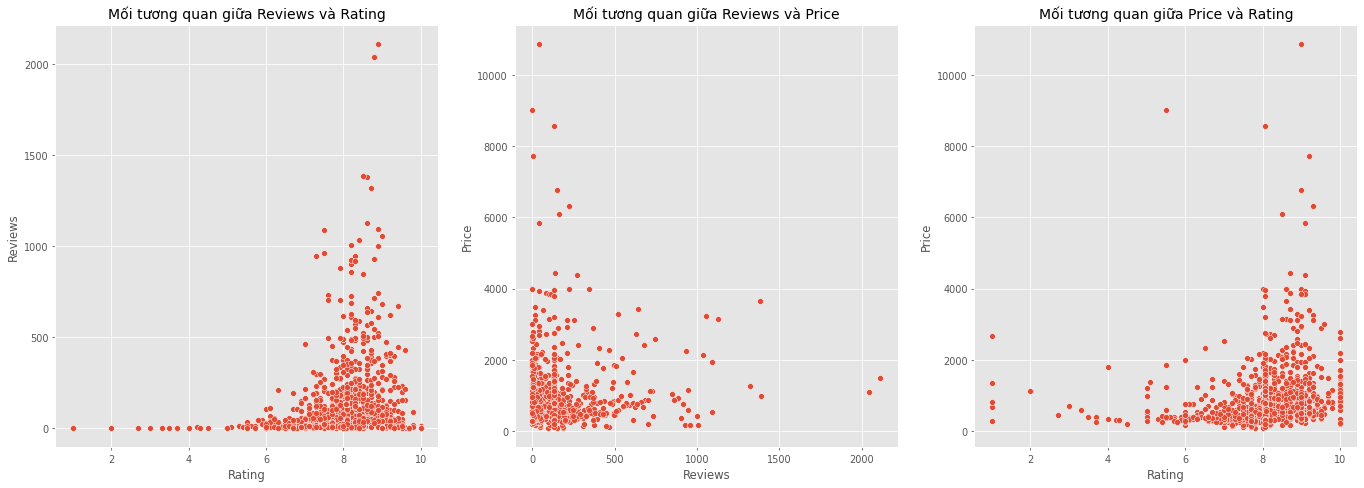

In [8]:
rating = dataFrame['Rating']
reviews = dataFrame['Reviews']
price = dataFrame['Price']

# Scatter
plt.figure(figsize=(24, 8), dpi=70)

plt.subplot(1, 3, 1)
sns.scatterplot(data=dataFrame, x="Rating", y="Reviews")
plt.title("Mối tương quan giữa Reviews và Rating")

plt.subplot(1, 3, 2)
sns.scatterplot(data=dataFrame, x="Reviews", y="Price")
plt.title("Mối tương quan giữa Reviews và Price")

plt.subplot(1, 3, 3)
sns.scatterplot(data=dataFrame, x="Rating", y="Price")
plt.title("Mối tương quan giữa Price và Rating")
plt.show()

- *Dữ liệu chủ yếu phân bố tập trung ở góc dưới màn hình -> cho thấy độ tương quan giữa các đặc trưng là không cao*.

**Biểu đồ Boxplot và Hisplot để làm rõ hơn về sự phân bố các mẫu.**

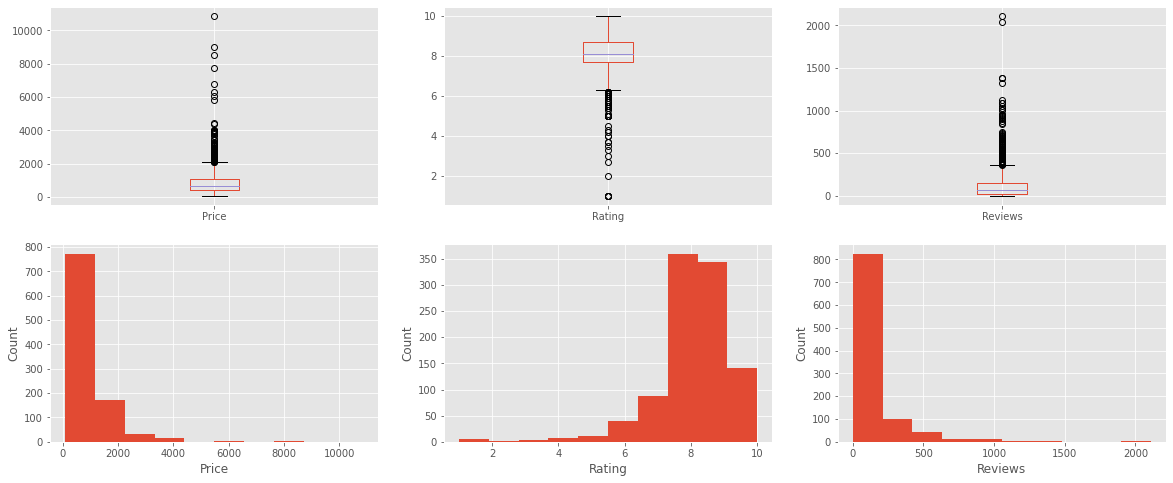

In [9]:
plt.figure(figsize=(20, 8), )
plt.subplot(2,3,1)
dataFrame.boxplot(column='Price')
plt.subplot(2,3,2)
dataFrame.boxplot(column='Rating')
plt.subplot(2,3,3)
dataFrame.boxplot(column='Reviews')
plt.subplot(2,3,4)
dataFrame.Price.hist()
plt.xlabel('Price')
plt.ylabel('Count')
plt.subplot(2,3,5)
dataFrame.Rating.hist()
plt.xlabel('Rating')
plt.ylabel('Count')
plt.subplot(2,3,6)
dataFrame.Reviews.hist()
plt.xlabel('Reviews')
plt.ylabel('Count')
plt.show()

- *Dữ liệu của các đặc trưng này không dàn trải, đối xứng mà tập trung về một phía*.
- *Giá phòng khách sạn chủ yếu dưới 2 triệu đồng*.
- *Dữ liệu tập trung ở phần Rating từ 6đ tới 10đ*.
- *Dữ liệu tập trung ở phần Reviews từ 0 tới 400 lượt*.

## Trích xuất dữ liệu

**Lựa chọn đặc trưng**

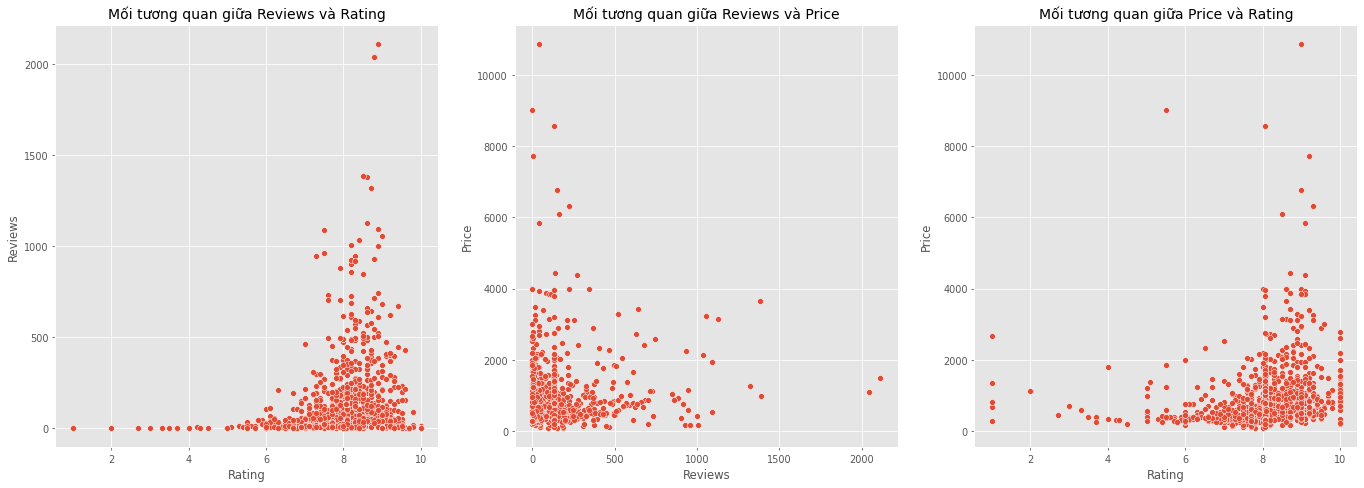

In [10]:
# Scatter
plt.figure(figsize=(24, 8), dpi=70)

plt.subplot(1, 3, 1)
sns.scatterplot(data=dataFrame, x="Rating", y="Reviews")
plt.title("Mối tương quan giữa Reviews và Rating")

plt.subplot(1, 3, 2)
sns.scatterplot(data=dataFrame, x="Reviews", y="Price")
plt.title("Mối tương quan giữa Reviews và Price")

plt.subplot(1, 3, 3)
sns.scatterplot(data=dataFrame, x="Rating", y="Price")
plt.title("Mối tương quan giữa Price và Rating")
plt.show()

- Việc lựa chọn thường phụ thuộc vào giá và rating.
- Tuy nhiên số lượt review lại có sự ảnh hưởng đến chất lượng của rating.
- Theo biểu đồ, rating tập trung trong khoảng từ 6-10, tuy nhiên trong khoảng đó lượt reviews lại không đồng đều.
- Do đó, để tăng chất lượng cho rating => gộp cột rating và reviews lại thành rating_reviews

**Giảm chiều dữ liệu ( rating và reviews gộp lại thành rating_reviews)**

In [11]:
Rating_Reviews = []
for i in range(0,dataFrame["Rating"].size):
    Rating_Reviews.append(dataFrame["Rating"][i] * dataFrame["Reviews"][i])
dataFrame = pd.concat([dataFrame, pd.DataFrame(Rating_Reviews, columns= ["Rating_Reviews"])], axis = 1)
dataFrame = dataFrame.drop(columns=["Reviews", "Rating"])
dataFrame

,Name,Price,Location,Rating_Reviews
0,Lucky Star Hotel 266 De Tham,165.000,"District 1, Ho Chi Minh City",8232.800000
1,Eden Garden Hotel,160.000,"District 1, Ho Chi Minh City",3016.000000
2,Ngan Ha Hotel,516.000,"District 1, Ho Chi Minh City",915.300000
3,Anh Duy Hotel - Nguyễn Công Trứ The Bitexco Ne...,90.000,"District 1, Ho Chi Minh City",1216.000000
4,Calista Sai Gon Hotel,748.000,"District 1, Ho Chi Minh City",1642.600000
...,...,...,...,...
995,Angela Home - A cozy 2 bedroom apartment with ...,1600.000,"District 2, Ho Chi Minh City",1092.884243
996,Hotel An Nhi,290.407,Ho Chi Minh City,10.000000
997,KIMI HOST AIRBNB,1200.000,"Binh Thanh, Ho Chi Minh City",1092.884243
998,Sunrise Cityview Apt *****,1840.000,Ho Chi Minh City,11.000000


**Biểu đồ Boxplot và Hisplot**

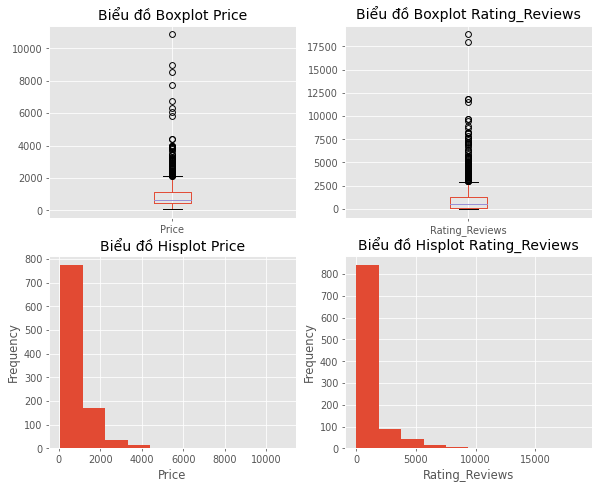

In [12]:
plt.figure(figsize=(10, 8), dpi=70)
plt.subplot(2,2,1)
dataFrame.boxplot(column='Price')
plt.title("Biểu đồ Boxplot Price");
plt.subplot(2,2,2)
dataFrame.boxplot(column='Rating_Reviews')
plt.title("Biểu đồ Boxplot Rating_Reviews");
plt.subplot(2,2,3)
dataFrame.Price.hist()
plt.title("Biểu đồ Hisplot Price");
plt.xlabel("Price");
plt.ylabel("Frequency");
plt.subplot(2,2,4)
dataFrame.Rating_Reviews.hist()
plt.title("Biểu đồ Hisplot Rating_Reviews");
plt.ylabel("Frequency");
plt.xlabel("Rating_Reviews");
plt.show()

**Làm sạch dữ liệu**

Xóa dữ liệu trùng lặp

In [13]:
dataFrame.drop_duplicates() 
dataFrame.shape

(1000, 4)

Xử lý ngoại lệ

In [14]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
dataFrame = remove_outlier(dataFrame,"Price").reset_index(drop=True)
dataFrame
dataFrame = remove_outlier(dataFrame,"Rating_Reviews").reset_index(drop=True)
dataFrame

,Name,Price,Location,Rating_Reviews
0,Eden Garden Hotel,160.000,"District 1, Ho Chi Minh City",3016.000000
1,Ngan Ha Hotel,516.000,"District 1, Ho Chi Minh City",915.300000
2,Anh Duy Hotel - Nguyễn Công Trứ The Bitexco Ne...,90.000,"District 1, Ho Chi Minh City",1216.000000
3,Calista Sai Gon Hotel,748.000,"District 1, Ho Chi Minh City",1642.600000
4,Metro Points HCM Hotel- Bến Thành Market,431.661,"District 1, Ho Chi Minh City",643.800000
...,...,...,...,...
923,Angela Home - A cozy 2 bedroom apartment with ...,1600.000,"District 2, Ho Chi Minh City",1092.884243
924,Hotel An Nhi,290.407,Ho Chi Minh City,10.000000
925,KIMI HOST AIRBNB,1200.000,"Binh Thanh, Ho Chi Minh City",1092.884243
926,Sunrise Cityview Apt *****,1840.000,Ho Chi Minh City,11.000000


Biểu đồ Boxplot và Hisplot sau khi làm sạch

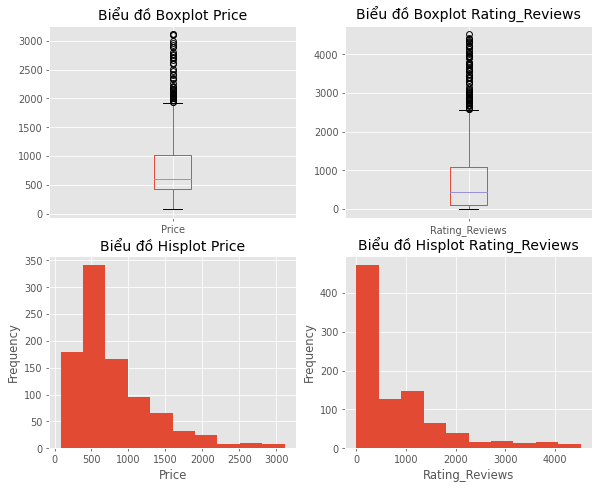

In [15]:
plt.figure(figsize=(10, 8), dpi=70)
plt.subplot(2,2,1)
dataFrame.boxplot(column='Price')
plt.title("Biểu đồ Boxplot Price");
plt.subplot(2,2,2)
dataFrame.boxplot(column='Rating_Reviews')
plt.title("Biểu đồ Boxplot Rating_Reviews");
plt.subplot(2,2,3)
dataFrame.Price.hist()
plt.title("Biểu đồ Hisplot Price");
plt.xlabel("Price");
plt.ylabel("Frequency");
plt.subplot(2,2,4)
dataFrame.Rating_Reviews.hist()
plt.title("Biểu đồ Hisplot Rating_Reviews");
plt.ylabel("Frequency");
plt.xlabel("Rating_Reviews");
plt.show()

Quá trình làm sạch đã giúp giảm bớt các ngoại lệ ở phía 2 biên của phân bố dữ liệu
- Boxplot đã cho thấy không còn điểm ngoại lệ nào
- Hisplot cho thấy độ chênh lệch tần số xuất hiện của dữ liệu cũng giảm bớt

**Chuẩn hóa dữ liệu (MinMax)**

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataFrame[['Price']])
dataFrame[['Price']] = scaler.transform(dataFrame[['Price']])
scaler.fit(dataFrame[['Rating_Reviews']])
dataFrame[['Rating_Reviews']] = scaler.transform(dataFrame[['Rating_Reviews']])
dataFrame

,Name,Price,Location,Rating_Reviews
0,Eden Garden Hotel,0.026028,"District 1, Ho Chi Minh City",0.667006
1,Ngan Ha Hotel,0.143317,"District 1, Ho Chi Minh City",0.202270
2,Anh Duy Hotel - Nguyễn Công Trứ The Bitexco Ne...,0.002965,"District 1, Ho Chi Minh City",0.268793
3,Calista Sai Gon Hotel,0.219753,"District 1, Ho Chi Minh City",0.363170
4,Metro Points HCM Hotel- Bến Thành Market,0.115530,"District 1, Ho Chi Minh City",0.142206
...,...,...,...,...
923,Angela Home - A cozy 2 bedroom apartment with ...,0.500457,"District 2, Ho Chi Minh City",0.241557
924,Hotel An Nhi,0.068992,Ho Chi Minh City,0.001991
925,KIMI HOST AIRBNB,0.368671,"Binh Thanh, Ho Chi Minh City",0.241557
926,Sunrise Cityview Apt *****,0.579529,Ho Chi Minh City,0.002212


Biểu đồ scatter sau khi chuẩn hóa

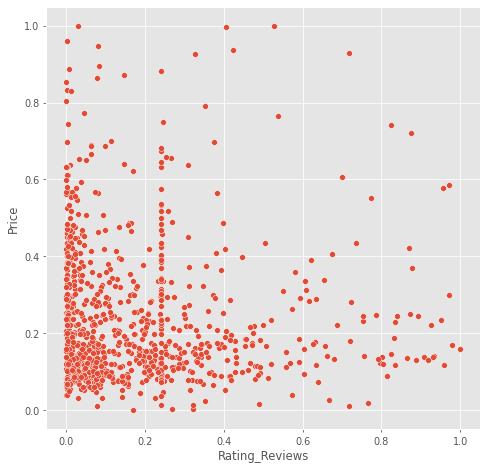

In [17]:
plt.figure(figsize=(8, 8), dpi=70)
sns.scatterplot(data=dataFrame, x="Rating_Reviews", y="Price")
plt.show()

Quá trình chuẩn hóa dữ liệu giúp làm tăng lên sự đồng đều cho dữ liệu và độ quan trọng của các đặc trưng

## Mô hình hóa dữ liệu

### K-Means clustering

**Elbow Method cho việc chọn K**

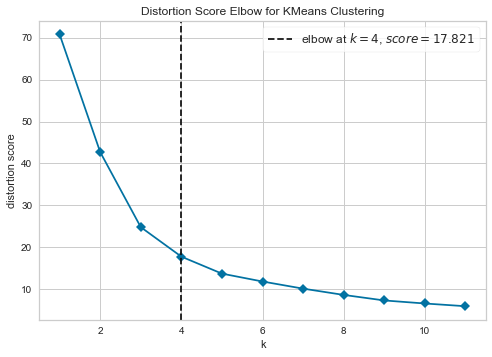

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
data = pd.DataFrame(dataFrame,columns=["Rating_Reviews","Price"])
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), timings=False).fit(data)
visualizer.show()

**K-means**

In [19]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
y_kmeans = kmeans.predict(data)
data = pd.concat([data, pd.DataFrame(y_kmeans)], axis=1)
data

,Rating_Reviews,Price,0
0,0.667006,0.026028,2
1,0.202270,0.143317,0
2,0.268793,0.002965,0
3,0.363170,0.219753,0
4,0.142206,0.115530,3
...,...,...,...
923,0.241557,0.500457,1
924,0.001991,0.068992,3
925,0.241557,0.368671,0
926,0.002212,0.579529,1


Kết quả các nhãn sau khi phân cụm

In [20]:
kmeans.labels_

array([2, 0, 0, 0, 3, 1, 2, 0, 0, 2, 3, 0, 3, 2, 0, 3, 0, 0, 2, 2, 0, 1,
       0, 0, 3, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 3, 2, 0, 0, 1,
       0, 2, 2, 2, 0, 3, 3, 0, 3, 0, 3, 0, 2, 0, 2, 3, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 1, 2, 2, 3, 0, 2, 3, 2, 2, 3, 2, 0, 3, 0, 0, 3, 0, 3, 0,
       0, 0, 0, 2, 1, 3, 2, 3, 0, 0, 0, 0, 2, 3, 0, 2, 2, 3, 0, 2, 3, 3,
       0, 3, 0, 3, 3, 3, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3, 3, 0, 2, 0, 0, 1,
       1, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 3, 2, 0,
       2, 0, 0, 0, 0, 3, 2, 3, 1, 3, 2, 3, 3, 2, 1, 0, 3, 0, 0, 2, 3, 2,
       3, 3, 3, 3, 0, 1, 0, 3, 2, 0, 3, 0, 0, 3, 0, 0, 2, 1, 3, 3, 0, 3,
       0, 0, 0, 2, 0, 2, 0, 3, 0, 2, 0, 0, 0, 3, 1, 0, 1, 3, 3, 3, 0, 1,
       3, 1, 3, 3, 2, 1, 3, 0, 0, 1, 3, 2, 0, 0, 2, 0, 3, 3, 3, 3, 2, 0,
       0, 0, 3, 0, 1, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 1, 2, 0, 2, 3, 3, 2,
       0, 0, 0, 2, 2, 1, 1, 3, 3, 3, 2, 1, 3, 0, 1, 3, 1, 1, 1, 3, 0, 3,
       3, 0, 1, 1, 1, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3,

Inertia là tổng bình phương khoảng cách các điểm đến tâm cụm gần nhất

In [21]:
kmeans.inertia_

17.821396900177916

Các điểm tâm cụm

In [22]:
kmeans.cluster_centers_

array([[0.29038056, 0.17333751],
       [0.09794676, 0.53186965],
       [0.74606274, 0.24720505],
       [0.05225259, 0.15735129]])

Scatter Plot kết quả phân cụm

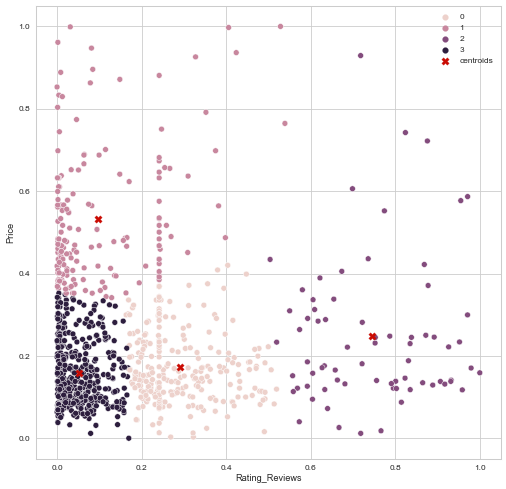

In [23]:
plt.figure(figsize=(10, 10), dpi=60)
sns.scatterplot(data=data, x="Rating_Reviews", y="Price", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

### Hierarchical clustering

**Dendogram**

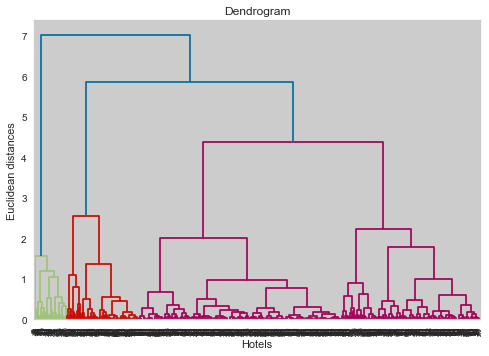

In [24]:
import scipy.cluster.hierarchy as sch

data1 = pd.DataFrame(dataFrame,columns=["Rating_Reviews","Price"])
dendrogram = sch.dendrogram(sch.linkage(data1, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Hotels')
plt.ylabel('Euclidean distances')
plt.show()

**Hierarchical**

In [25]:
from sklearn.cluster import AgglomerativeClustering


cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data1)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Kết quả phân cụm

<AxesSubplot:xlabel='Rating_Reviews', ylabel='Price'>

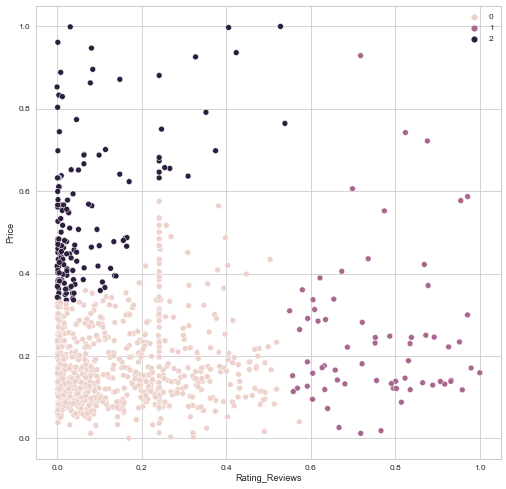

In [26]:
plt.figure(figsize=(10, 10), dpi=60)
sns.scatterplot(data=data1, x="Rating_Reviews", y="Price", hue=cluster.labels_)

### Đánh giá thuật toán

**Silhouette Index**

In [27]:
from sklearn import metrics
score = metrics.silhouette_score(data, kmeans.labels_, metric='euclidean')
score

0.8632207901112803

In [28]:
score1 = metrics.silhouette_score(data1, cluster.labels_, metric='euclidean')
score1

0.4678157865207517

Kết luận:
- Chỉ số Silhouette của k-means có giá trị cao hơn so với hierarchical (0.86 > 0.46)
- Chỉ số của k-means khá cao và gần tiến về 1
- Suy ra kết quả phân cụm của k-means khá tốt và sát với thực tế

**DB Index**

In [29]:
db_score =  metrics.davies_bouldin_score(data, kmeans.labels_)
db_score

0.2718518242816368

In [30]:
db_score1 =  metrics.davies_bouldin_score(data1, cluster.labels_)
db_score1

0.7431461462580913

Kết luận:
- Chỉ số DB Index của kmeans thấp hơn so với hierarchical (0.27 < 0.74)
- Suy ra kết quả phân cụm của kmeans tốt hơn so với hierarchical

**Lựa chọn cụm để gợi ý**

Cụm được lựa chọn là cụm có giá thấp và đánh giá cao từ người dùng.

In [31]:
idx = np.where(kmeans.labels_ == 2)
arr = np.array(clean_data)
arr = arr[idx]
arr

array([['Lucky Star Hotel 266 De Tham', 165.0, 8.2, 1004.0,
        'District 1, Ho Chi Minh City'],
       ['Cochin Sang Hotel', 1152.0, 9.0, 82.0,
        'District 1, Ho Chi Minh City'],
       ['HOME Hotel', 810.185, 9.2, 148.0, 'Phu Nhuan, Ho Chi Minh City'],
       ['LA VELA Saigon Hotel', 1653.692, 8.2, 612.0,
        'District 3, Ho Chi Minh City'],
       ['Emerald Central', 570.591, 8.8, 199.0,
        'District 3, Ho Chi Minh City'],
       ['9 Hostel and Bar', 353.832, 8.2, 904.0,
        'District 1, Ho Chi Minh City'],
       ['Alagon Saigon Hotel & Spa', 883.575, 8.2, 687.0,
        'District 1, Ho Chi Minh City'],
       ['8B Aparthotel', 850.0, 9.2, 103.0, 'Tan Binh, Ho Chi Minh City'],
       ['Hotel Nikko Saigon', 2411.565, 9.0, 681.0,
        'District 1, Ho Chi Minh City'],
       ['Emerald Boutique Hotel', 216.0, 8.0, 107.0,
        'District 1, Ho Chi Minh City'],
       ['Saigon Fairy Land - Masteri Millennium', 1620.0, 9.2, 25.0,
        'District 4, Ho Chi Min

Gợi ý 5 khách sạn ưu tiên review cao và giá thấp.

In [32]:
arr = np.array(clean_data)
arr = arr[idx]
arr = sorted(arr, key=lambda x: (-x[2], x[1]))
arr[:5]

[array(['Ngan Ha Apartment', 918.0, 9.3, 49.0,
        'District 7, Ho Chi Minh City'], dtype=object),
 array(['Vera Saigon Apartments - Vinhomes Central Park', 2103.75, 9.3,
        31.0, 'Binh Thanh, Ho Chi Minh City'], dtype=object),
 array(['HOME Hotel', 810.185, 9.2, 148.0, 'Phu Nhuan, Ho Chi Minh City'],
       dtype=object),
 array(['8B Aparthotel', 850.0, 9.2, 103.0, 'Tan Binh, Ho Chi Minh City'],
       dtype=object),
 array(['Saigon Fairy Land - Masteri Millennium', 1620.0, 9.2, 25.0,
        'District 4, Ho Chi Minh City'], dtype=object)]

### Kết luận

- Bài toán đã giải quyết được vấn đề đặt ra đó là tìm ra các khách sạn phù hợp với hai tiêu chí: giá cart thấp và chất lượng tốt để đề xuất cho người dùng. Đồng thời, bài toán đã so sánh và đánh giá giữa hai thuật toán để đạt được kết quả tốt nhất.
- Tuy nhiên, cần mở rộng nguồn dữ liệu cũng như cải thiện về các thuật toán trích xuất đặc trưng và thuật toán dùng để gợi ý. Đồng thời, sử dụng nhiều phương pháp so sánh, đánh giá thuật toán hơn để có được sự chính xác cao nhất và thu được kết quả tốt nhất.
